In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

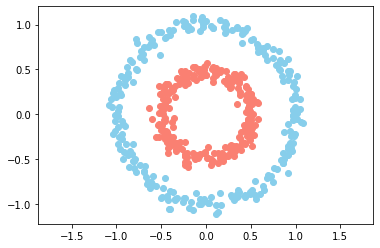

In [7]:
n = 500
p = 2

X, Y = make_circles(n_samples = n, factor= 0.5, noise= 0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [3]:
class neuronal_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f

        self.b = np.random.rand(1, n_neur) * 2 - 1
        self.w = np.random.rand(n_conn, n_neur) * 2 - 1

In [4]:
# Activation functions
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

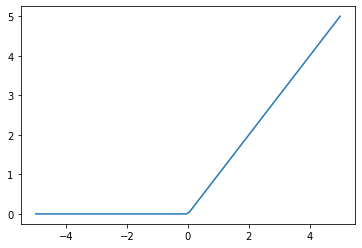

In [5]:
# Test Activation functions
_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))
plt.show()

In [6]:
l0 = neuronal_layer(p, 4, sigm)
l1 = neuronal_layer(4, 8, sigm)


def create_nn(topology, act_f):
    nn = []

    for l, layer in enumerate(topology[: -1]):
        nn.append(neuronal_layer(topology[l], topology[l+1], act_f))
    return nn



In [15]:
topology = [p, 4, 8, 1]

neuronal_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neuronal_net, X, Y, l2_cost, lr=0.5, train = True):

    out = [(None, X)]

    # Forward pass
    for l, layer in enumerate(neuronal_net):
        z = out[-1][1] @ neuronal_net[l].w + neuronal_net[l].b
        a = neuronal_net[l].act_f[0](z)

        out.append((z, a))
    
    if train:
        
        # Backward pass
        deltas = []

        for l in reversed(range(0, len(neuronal_net))):

            z = out[l+1][0]
            a = out[l+1][1]
            if l == len(neuronal_net) - 1 :
                # Calculate delta in the last layer
                deltas.insert(0, l2_cost[1](a, Y) * neuronal_net[l].act_f[1](a))
            else:
                # Calculate delta respect to prev layer
                deltas.insert(0, deltas[0] @ _W.T * neuronal_net[l].act_f[1](a))

            _W = neuronal_net[l].w

            # Gradient descent
            neuronal_net[l].b = neuronal_net[l].b - np.mean(deltas[0], axis = 0, keepdims= True) * lr
            neuronal_net[l].w = neuronal_net[l].w - out[l][1].T @ deltas[0] * lr

    return out[-1][1]


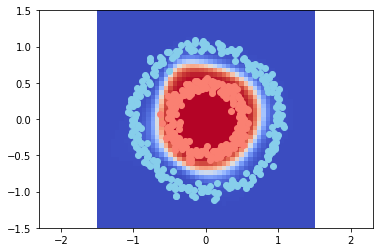

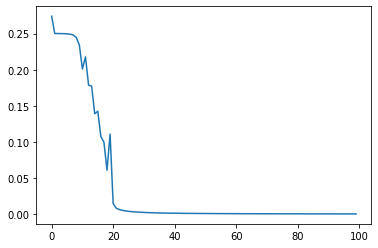

In [17]:
import time
from IPython.display import clear_output

neuronal_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    # Train a network
    pY = train(neuronal_n, X, Y, l2_cost, lr= 0.05)

    if i % 25 == 0:
        print(pY)

        loss.append(l2_cost[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neuronal_n, np.array([[x0, x1]]), Y, l2_cost, train= False)[0][0]
        
        plt.pcolormesh(_x0, _x1, _Y, cmap= "coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

        clear_output(wait= True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)